Email spam detection 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ABC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [3]:
df=pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.shape

(5572, 5)

Data cleaning

In [7]:
df.drop(df.iloc[:,2:],axis=1,inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [10]:
df['v1']=pd.get_dummies(df['v1'],drop_first=True,dtype='int')

In [11]:
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df.drop_duplicates(keep='first',inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

EDA

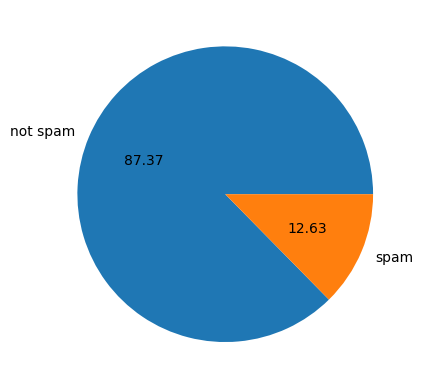

In [17]:
plt.pie(df['v1'].value_counts(),labels=['not spam','spam'],autopct='%.2f')
plt.show()

from above it depicts that data is unbalanced 

In [18]:
df['num of characters']=df['v2'].apply(len)

In [19]:
df['no of words']=df['v2'].apply(lambda x: len(nltk.word_tokenize(x)))

In [20]:
df['num of sentenses']=df['v2'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [21]:
df.head()

,v1,v2,num of characters,no of words,num of sentenses
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df.iloc[:,2:].describe()

,num of characters,no of words,num of sentenses
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
#spam
df[df['v1']==1 ][['num of characters'	,'no of words'	,'num of sentenses']].describe()

,num of characters,no of words,num of sentenses
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


for spam msgs on avg  num of words=27 ,num of charcters=138

In [24]:
# not spam
df[df['v1']==0 ][['num of characters'	,'no of words'	,'num of sentenses']].describe()

,num of characters,no of words,num of sentenses
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


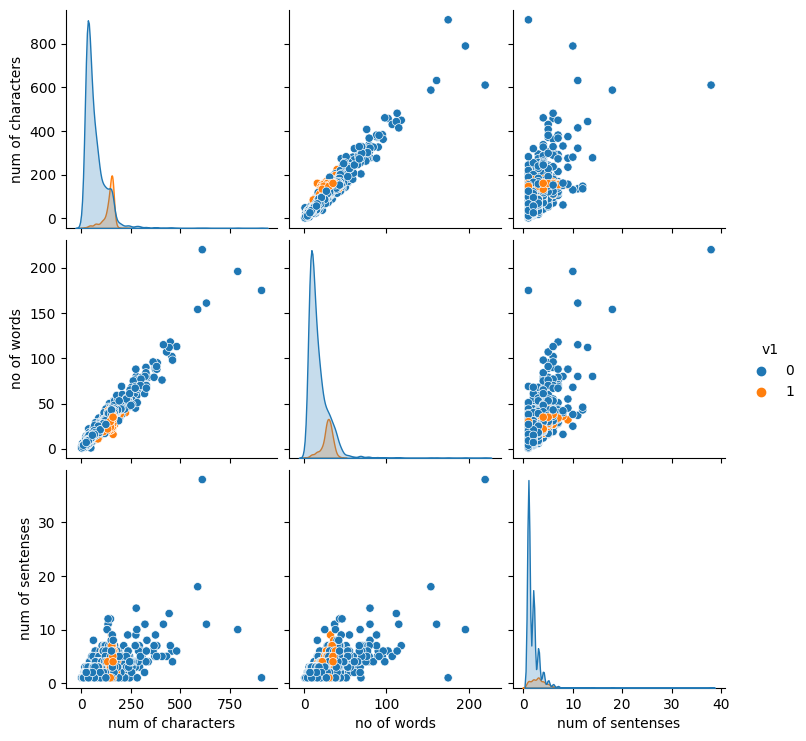

In [25]:
sns.pairplot(df,hue='v1')

Data preprocessing for
   case converting
   token generation
   removing special charaters
   removing stop words
   stemming

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ABC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [27]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords 
import string
ps=PorterStemmer()

In [28]:
def preprocess(text):

    #case convertion
    text=text.lower()
    #token generation
    text=nltk.word_tokenize(text)

    #removing special characters
    x=[]
    for i in text:
        if i.isalnum():
            x.append(i)

    #removing stop words
    text=x[:]
    y=[]
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    #stemming
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)            

In [29]:
df['preprocessed_text']=df['v2'].apply(preprocess)

In [39]:
df.head()

,v1,v2,num of characters,no of words,num of sentenses,preprocessed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

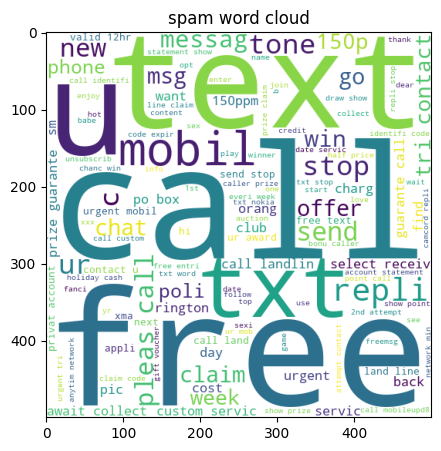

In [41]:
spamw=wc.generate(df[df['v1']==1]['preprocessed_text'].str.cat(sep=' '))
plt.figure(figsize=(10,5))
plt.imshow(spamw)
plt.title('spam word cloud')
plt.show()

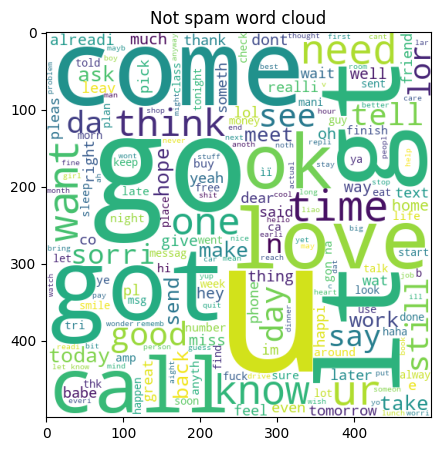

In [42]:
spamwn=wc.generate(df[df['v1']==0]['preprocessed_text'].str.cat(sep=' '))
plt.figure(figsize=(10,5))
plt.imshow(spamwn)
plt.title('Not spam word cloud')
plt.show()

vectorizing

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [44]:
x=cv.fit_transform(df['preprocessed_text']).toarray()

In [46]:
x.shape

(5169, 6708)

In [47]:
y=df['v1'].values

Model Building

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [51]:
from lazypredict.Supervised import LazyClassifier
lazy=LazyClassifier()

In [52]:
lazy.fit(x_train,x_test,y_train,y_test)

 97%|█████████▋| 28/29 [13:17<00:25, 25.60s/it]

[LightGBM] [Info] Number of positive: 520, number of negative: 3615
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1267
[LightGBM] [Info] Number of data points in the train set: 4135, number of used features: 331
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.125756 -> initscore=-1.939018
[LightGBM] [Info] Start training from score -1.939018


100%|██████████| 29/29 [13:23<00:00, 27.72s/it]


(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 PassiveAggressiveClassifier        0.97               0.95     0.95      0.97   
 LGBMClassifier                     0.98               0.95     0.95      0.98   
 XGBClassifier                      0.98               0.95     0.95      0.98   
 Perceptron                         0.96               0.95     0.95      0.96   
 LogisticRegression                 0.98               0.94     0.94      0.98   
 LinearSVC                          0.96               0.94     0.94      0.96   
 AdaBoostClassifier                 0.97               0.93     0.93      0.97   
 ExtraTreesClassifier               0.98               0.92     0.92      0.98   
 BaggingClassifier                  0.97               0.92     0.92      0.97   
 DecisionTreeClassifier             0.97               0.92     0.92      0.97   
 RandomForestCla

In [ ]:
#linearSVM
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,precision_score
lsvm=LinearSVC()

In [ ]:
lsvm.fit(x_train,y_train)
predsvm=lsvm.predict(x_test)
accsvm=accuracy_score(y_test,predsvm)
precsvm=precision_score(y_test,predsvm)
print(f'LinearSVC \n accuracy={accsvm*100}\tprecision={precsvm}')

LinearSVC 
 accuracy=97.77562862669245	precision=0.9911504424778761


In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()

In [ ]:
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
accmnb=accuracy_score(y_test,predmnb)
precmnb=precision_score(y_test,predmnb)
print(f'MultinomialNB\n accuracy={accmnb*100}\tprecision={precmnb}')

MultinomialNB
 accuracy=97.38878143133462	precision=0.8962962962962963


In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgbc=HistGradientBoostingClassifier()

In [ ]:
hgbc.fit(x_train,y_train)
predhgbc=hgbc.predict(x_test)
acchgbc=accuracy_score(y_test,predhgbc)
prehgbc=precision_score(y_test,predhgbc)
print(f'HistGradientBoostingClassifier\n accuracy={acchgbc*100}\tprecision={prehgbc}')

HistGradientBoostingClassifier
 accuracy=96.80851063829788	precision=0.954954954954955


In [61]:
from sklearn.linear_model import PassiveAggressiveClassifier
pas=PassiveAggressiveClassifier()

In [64]:
pas.fit(x_train, y_train)
predpas=pas.predict(x_test)
accpas=accuracy_score(y_test,predpas)
prepas=precision_score(y_test,predpas)
print(f'PassiveAggressiveClassifier\n accuracy={accpas*100}\tprecision={prepas}')

NameError: name 'accuracy_score' is not defined

In [58]:
a=[accsvm,accpas,accmnb,acchgbc]
p=[precsvm,prepas,precmnb,prehgbc]
rep={'accuracy':a,'precision':p}
ind=['svm','passiveagressive','multinomialNB','histgradientboosting']
re=pd.DataFrame(rep,index=ind)
re


NameError: name 'accsvm' is not defined

Overall LinearSVM classifier got highest performance
accuracy=97.77562862669245	precision=0.9911504424778761

In [ ]:
import pickle 
pickle.dump(lsvm,open('spam_detection_LSVM.pkl','wb'))
pickle.dump(pas,open('spam_detection_passiveAgressiveclassifier.pkl','wb'))
pickle.dump(cv,open('Vectorizer.pkl','wb'))